In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_sacks_salary_18-19')

In [3]:
qbs.dtypes

NAME           object
SACKS           int64
SACKS_rank    float64
salary          int64
dtype: object

In [4]:
qbs.head()

,NAME,SACKS,SACKS_rank,salary
0,Teddy Bridgewater,2,3.5,6000000
1,Blaine Gabbert,5,6.5,2000000
2,Derek Anderson,5,6.5,1073530
3,Colt McCoy,6,8.5,3250000
4,Mark Sanchez,7,11.0,915000


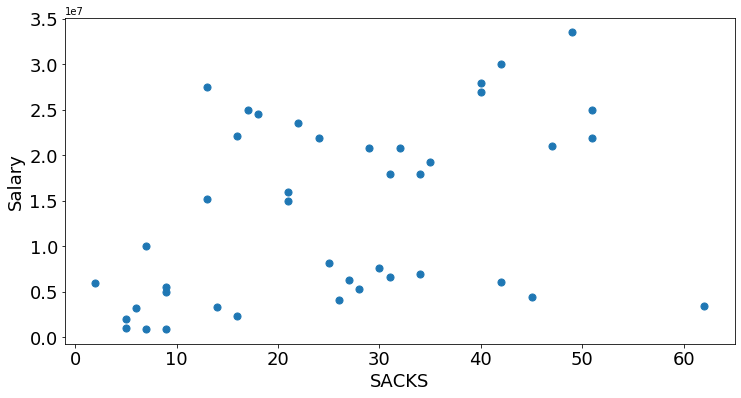

In [5]:
ax = qbs.plot(kind="scatter", x = 'SACKS',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('SACKS', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['SACKS', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 8.45884209e-17, -8.98751972e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 1.5889029 , -0.92952839],
       [-1.18283871, -1.02989164],
       [-0.16984277,  0.71089174],
       [ 1.32540851,  1.3380951 ],
       [ 0.19206519, -0.74310811]])

In [11]:
km.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0],
      dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,SACKS,SACKS_rank,salary,clusters
0,Teddy Bridgewater,2,3.5,6000000,1
1,Blaine Gabbert,5,6.5,2000000,1
2,Derek Anderson,5,6.5,1073530,1
3,Colt McCoy,6,8.5,3250000,1
4,Mark Sanchez,7,11.0,915000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[4.96666667e+01, 4.63883433e+06],
       [8.09090909e+00, 3.66558564e+06],
       [2.32857143e+01, 2.05464166e+07],
       [4.57142857e+01, 2.66285714e+07],
       [2.87142857e+01, 6.44660043e+06]])

In [14]:
qbs.groupby('clusters')[['SACKS', 'salary']].mean()

,SACKS,salary
clusters,,
0,49.666667,4.638834e+06
1,8.090909,3.665586e+06
2,23.285714,2.054642e+07
3,45.714286,2.662857e+07
4,28.714286,6.446600e+06


In [15]:
centroids = qbs.groupby('clusters')[['SACKS', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

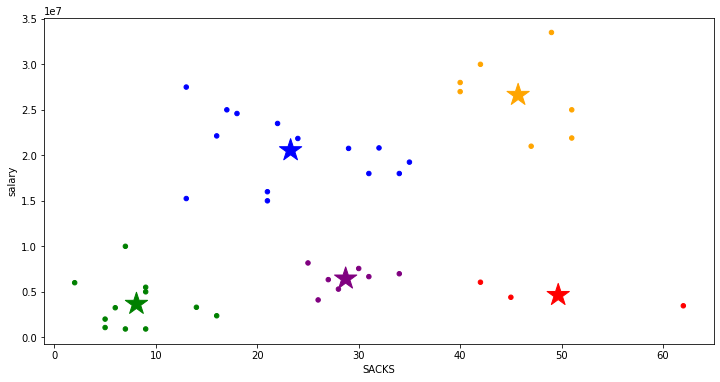

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'SACKS', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'SACKS', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

10.343342056707407

In [18]:
silhouette_score(X, km.labels_)

0.542914592321166